# Tailorit - Data Exploration

### Import required packages

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor

### Load data

In [3]:
df = tailor.load_data()

### Get an overview over the dataset

In [4]:
pd.options.display.float_format = "{:.2f}".format
df.describe(include=np.number)

,original_price,sells_price,discount,markdown,article_count,stock_total,avq,time_on_sale,revenue
count,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00
mean,51.33,43.87,2.58,4.88,8.52,2162.84,30.12,87.38,317.27
std,22.19,20.50,5.73,9.43,10.84,1960.91,22.89,50.69,385.77
min,9.95,-47.96,-99.96,-19.00,1.00,106.00,0.00,0.00,-47.96
25%,35.95,29.34,0.00,0.00,2.00,910.00,10.24,44.00,86.28
50%,49.95,39.95,0.28,0.00,5.00,1737.00,26.28,86.00,190.95
75%,64.95,58.02,2.50,10.00,11.00,2956.00,46.08,130.00,397.12
max,179.95,199.91,129.96,90.00,281.00,36396.00,100.25,181.00,13403.60


In [5]:
df.describe(include=['category'])

,article_id,season,brand,color,Abteilung,WHG,WUG
count,1131329,1131329,1131329,1131329,1131329,1131329,1131329
unique,8708,2,75,40,7,43,152
top,900486,Sommer,Fimmilena,schwarz,Abteilung002,WHG015,WUG053
freq,173,608555,80414,241952,498997,127617,51719


### Check for null values

In [6]:
df.isna().values.any()

False

Wow, we're in luck, there are no null values in the dataset!

### Plot sample article

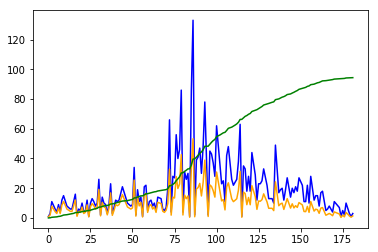

In [7]:
article = df.loc[df.article_id == 900003, [
    "time_on_sale", "article_count", "avq", "revenue"]]
plt.plot(article.time_on_sale, article.article_count, 'blue')
plt.plot(article.time_on_sale, article.revenue/40, 'orange')
plt.plot(article.time_on_sale, article.avq, 'green')